In [140]:
from scipy.fft import fft, fftfreq
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, sosfilt

In [142]:
def dft(data, fs):

    # data, fs = sf.read(filename)

    X = fft(data)

    frequencies = fftfreq(len(data), 1 / fs)

    #vzemi samo pozitivne frekvence
    frequencies = frequencies[:len(frequencies) // 2]
    X = np.abs(X[:len(X) // 2])

    energy_sum = 0
    for i in range(0, len(X)):
        energy_sum += X[i] ** 2

    present_frequencies = []
    for i in range(0, len(X)):

        presence = ((X[i] ** 2) * 100 / energy_sum)
        
        if (presence >= 1):
            present_frequencies.append([frequencies[i], round(presence)])

    # print("Prisotne so naslednje frekvence: ", present_frequencies)
    
    plt.figure(1)
    
    plt.title("Frekvenčni prostor") 
    plt.xlabel("Frekvenca")
    plt.ylabel("Amplituda")
    
    plt.plot(frequencies, X / len(data))
    
    plt.show()

    base = [0, 0]

    for i in range(0, len(present_frequencies)):
        if base[1] < present_frequencies[i][1]:
            base = present_frequencies[i]
    
    return X, frequencies, base[0]

In [143]:
def filter_data(data, fs, h, base, time):

    #harmonike so večkratniki osnovne frekvence
    harmonic = base * h
    
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
    filt = butter(5, [(harmonic - 5) / (fs / 2), (harmonic + 5) / (fs / 2)], "bandstop", output="sos")

    filtered_data = sosfilt(filt, data) #uporabi filter

    dft(filtered_data, fs)

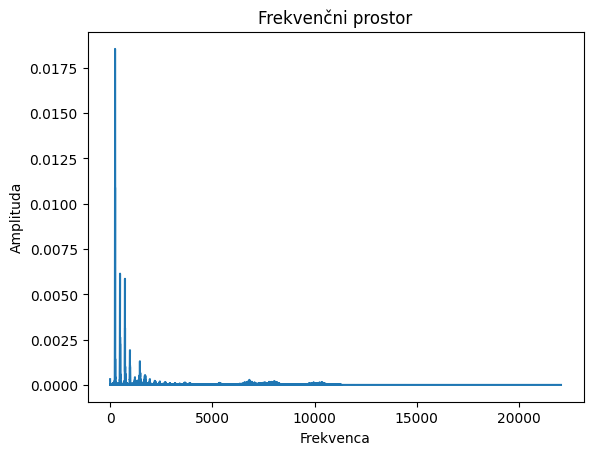

Base frequency is:  243.33333333333331


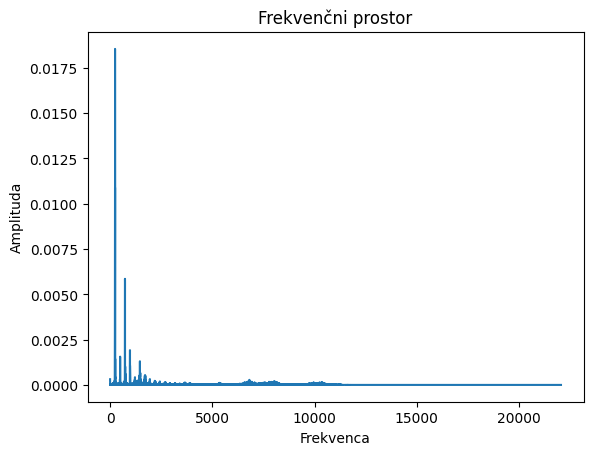

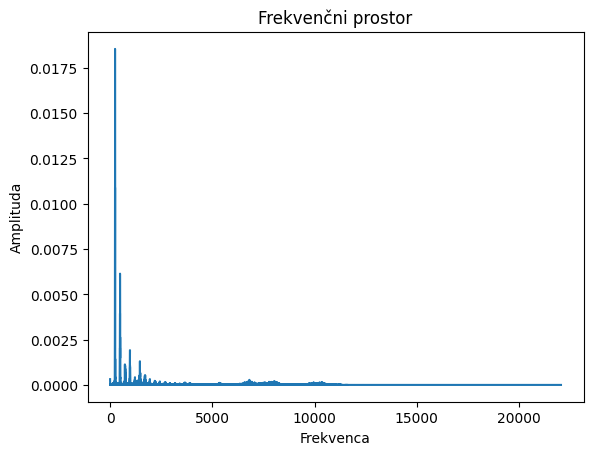

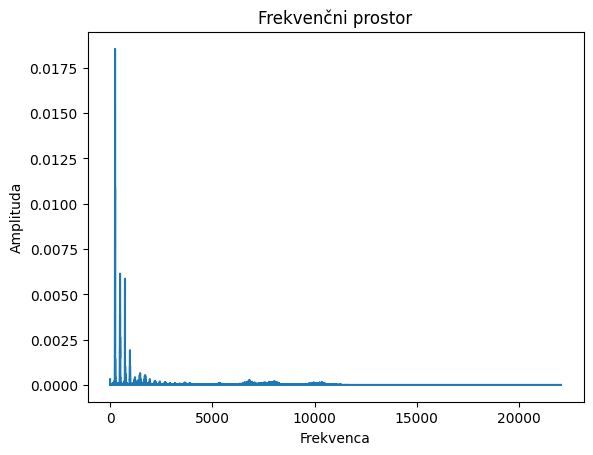

In [144]:
data, fs = sf.read("a.wav")

time_axis = np.linspace(0, len(data) / fs, num=len(data))

X, freq, base_freq = dft(data, fs)

print("Base frequency is: ", base_freq)

filter_data(data, fs, 2, base_freq, time_axis)
filter_data(data, fs, 3, base_freq, time_axis)
filter_data(data, fs, 6, base_freq, time_axis)

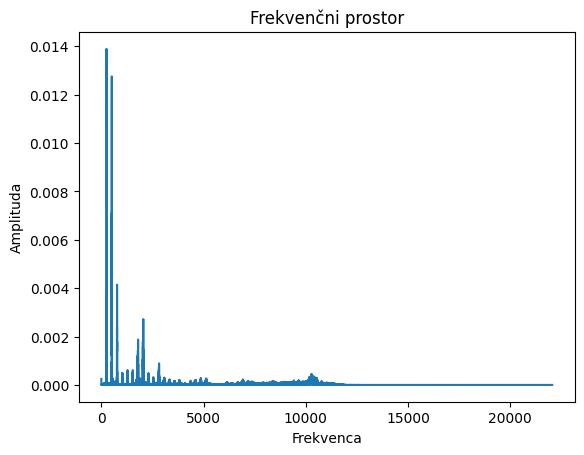

Base frequency is:  255.33333333333331


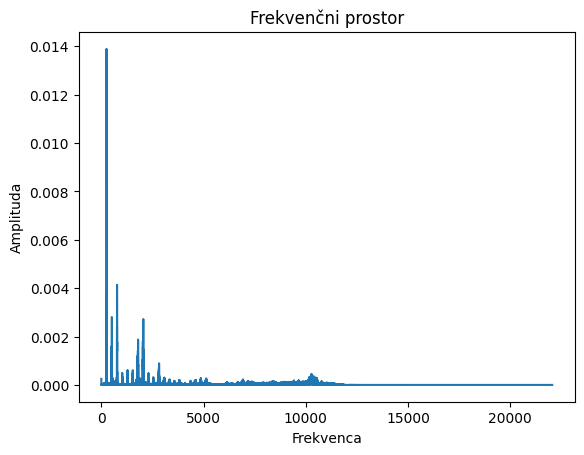

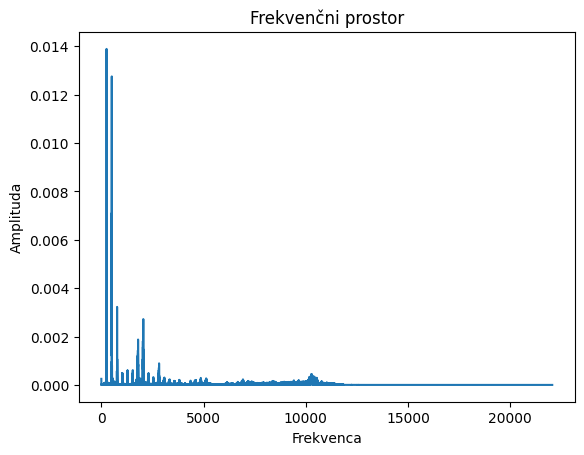

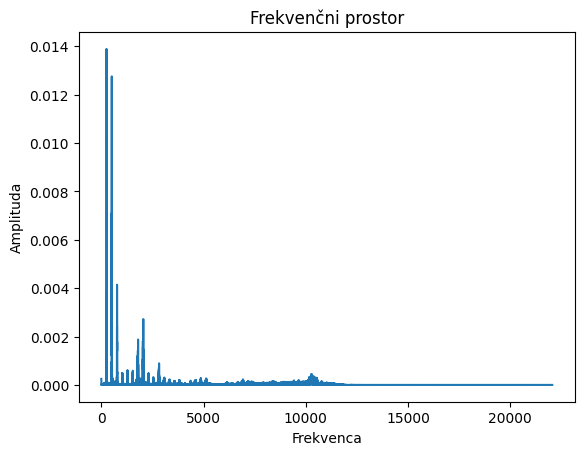

In [145]:
data, fs = sf.read("e.wav")

time_axis = np.linspace(0, len(data) / fs, num=len(data))

X, freq, base_freq = dft(data, fs)

print("Base frequency is: ", base_freq)

filter_data(data, fs, 2, base_freq, time_axis)
filter_data(data, fs, 3, base_freq, time_axis)
filter_data(data, fs, 6, base_freq, time_axis)

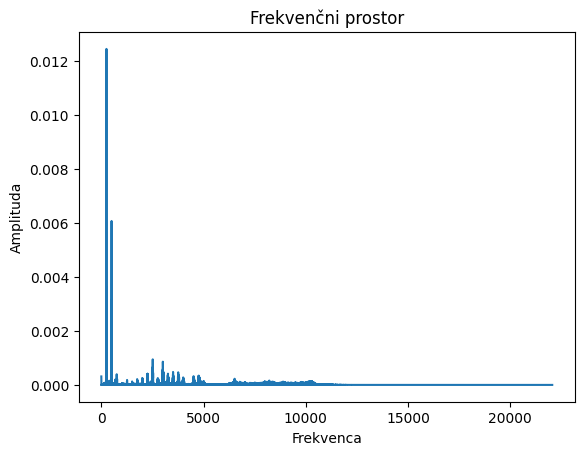

Base frequency is:  250.66666666666666


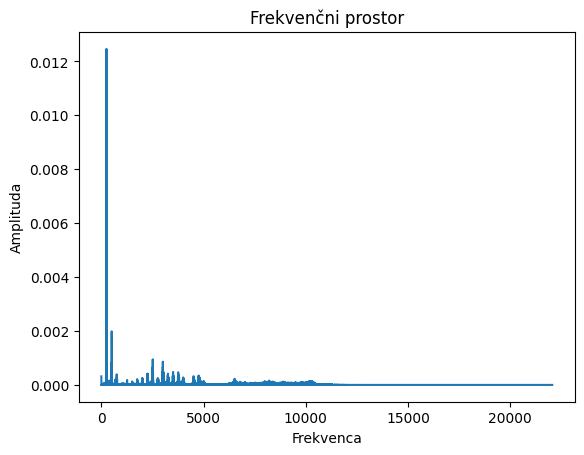

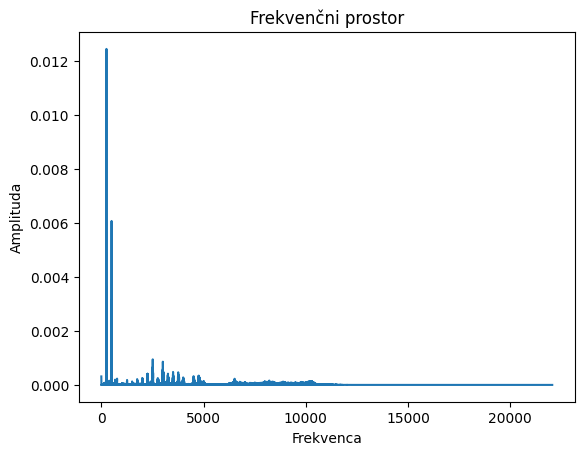

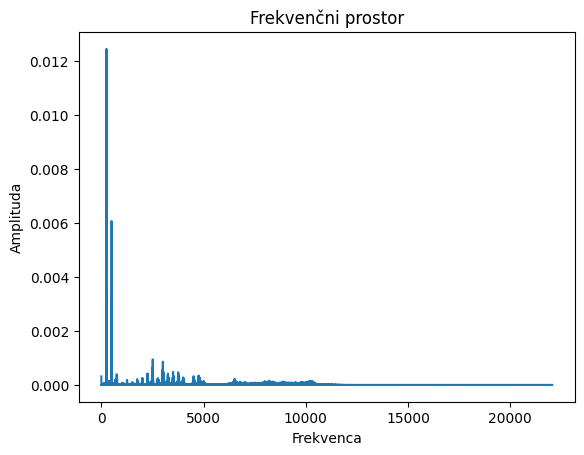

In [146]:
data, fs = sf.read("i.wav")

time_axis = np.linspace(0, len(data) / fs, num=len(data))

X, freq, base_freq = dft(data, fs)

print("Base frequency is: ", base_freq)

filter_data(data, fs, 2, base_freq, time_axis)
filter_data(data, fs, 3, base_freq, time_axis)
filter_data(data, fs, 6, base_freq, time_axis)

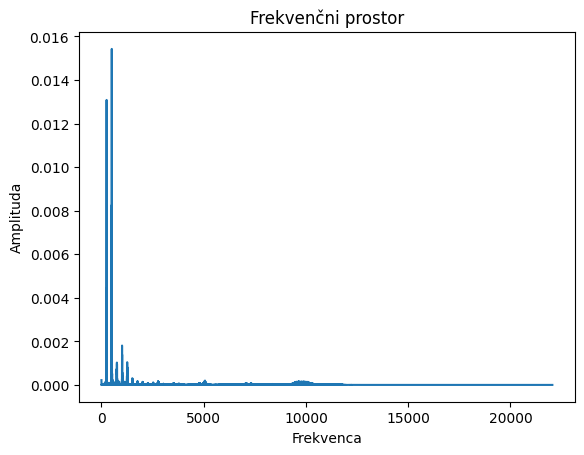

Base frequency is:  504.66666666666663


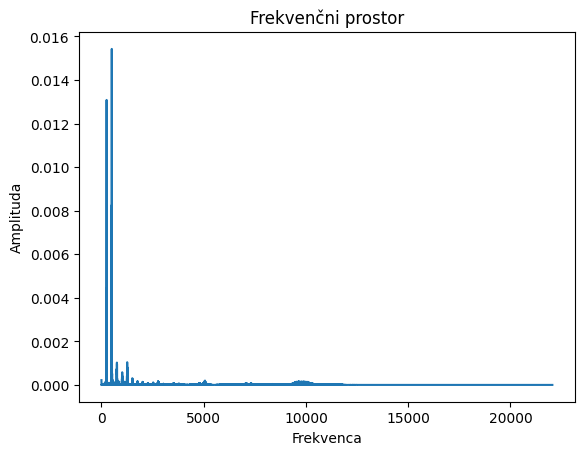

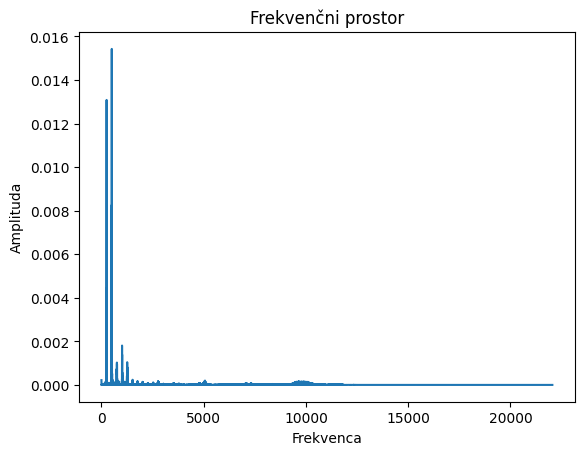

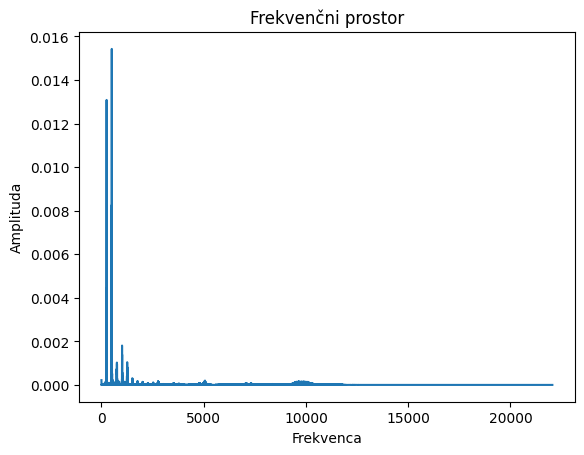

In [147]:
data, fs = sf.read("o.wav")

time_axis = np.linspace(0, len(data) / fs, num=len(data))

X, freq, base_freq = dft(data, fs)

print("Base frequency is: ", base_freq)

filter_data(data, fs, 2, base_freq, time_axis)
filter_data(data, fs, 3, base_freq, time_axis)
filter_data(data, fs, 6, base_freq, time_axis)

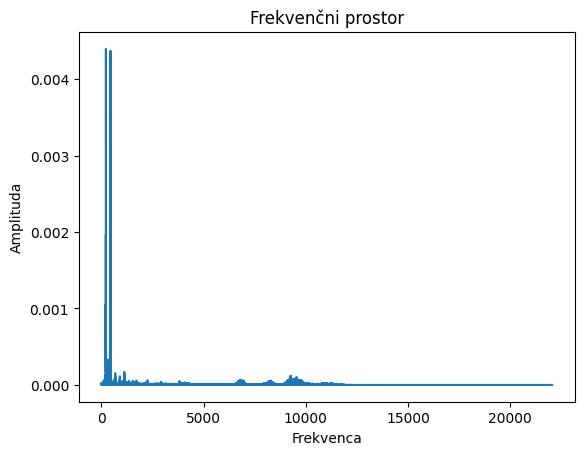

Base frequency is:  224.66666666666666


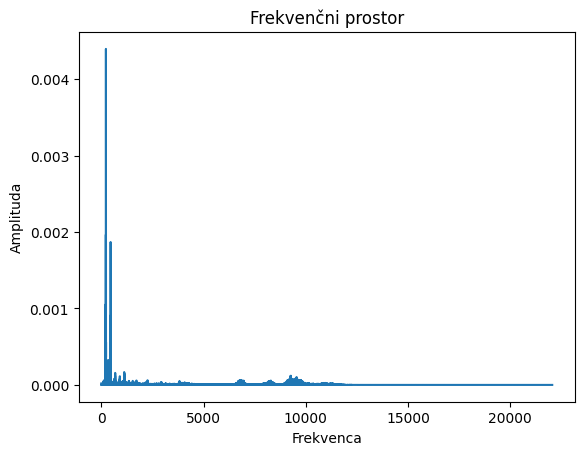

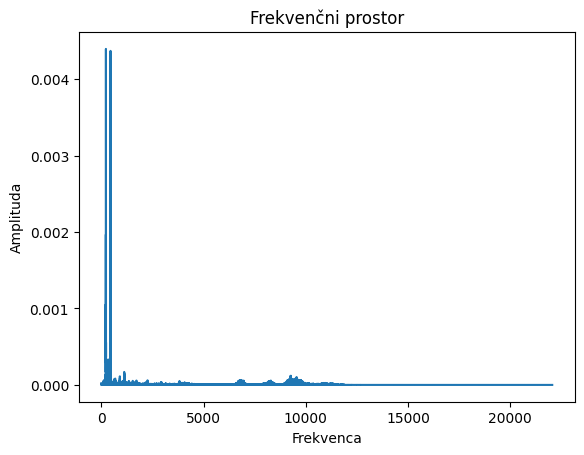

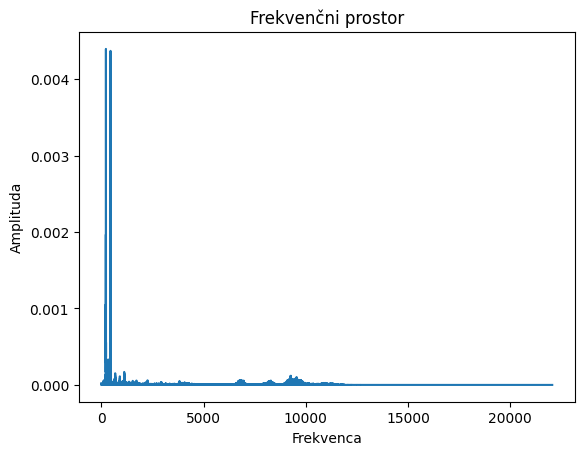

In [148]:
data, fs = sf.read("u.wav")

time_axis = np.linspace(0, len(data) / fs, num=len(data))

X, freq, base_freq = dft(data, fs)

print("Base frequency is: ", base_freq)

filter_data(data, fs, 2, base_freq, time_axis)
filter_data(data, fs, 3, base_freq, time_axis)
filter_data(data, fs, 6, base_freq, time_axis)

In [ ]:
#Filter višjega reda omogoča ostrejši prehod med frekvenco prepustnega in zapornega pasu.
#Višje harmonike lahko odstranite z uporabo band-stop filtra na frekvenci, ki predstavlja to višjo harmoniko.
#Kadar želimo načrtovati filter, je vedno dobro, če je višjega reda. Vendar pa lahko ti filtri zlahka postanejo 
#nestabilni. To lahko odpravimo tako, da uporabimo kaskado filtrov manjših redov.